### Package imports

In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib import rcParams
import seaborn as sns

In [48]:
path = 'results_plk_swt_vnt.csv'

In [49]:
df = pd.read_csv(path, index_col=0)

In [50]:
df_deseq = df[['Plk-vs-Swt_log2fc', 'Plk-vs-Vnt_log2fc', 'Swt-vs-Vnt_log2fc', 'Plk-vs-Swt_padj', 'Plk-vs-Vnt_padj', 'Swt-vs-Vnt_padj']]
df_deseq['padj_05'] = (df['Plk-vs-Swt_padj'] < 0.05) | (df['Plk-vs-Vnt_padj'] < 0.05) | (df['Swt-vs-Vnt_padj'] < 0.05)
df_deseq['padj_01'] = (df['Plk-vs-Swt_padj'] < 0.01) | (df['Plk-vs-Vnt_padj'] < 0.01) | (df['Swt-vs-Vnt_padj'] < 0.01)
df_deseq['padj_001'] = (df['Plk-vs-Swt_padj'] < 0.001) | (df['Plk-vs-Vnt_padj'] < 0.001) | (df['Swt-vs-Vnt_padj'] < 0.001)
df_deseq['log2fc_3'] = (df['Plk-vs-Swt_log2fc'] > 3) | (df['Plk-vs-Vnt_log2fc'] > 3) | (df['Swt-vs-Vnt_log2fc'] > 3)

/Users/luke/anaconda/envs/qiime190/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/luke/anaconda/envs/qiime190/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/luke/anaconda/envs/qiime190/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [51]:
df_ancom = pd.read_csv('ancom_results.csv', index_col=0)

In [52]:
df_merged = pd.concat([df_deseq, df_ancom], axis=1)

In [53]:
w = set(list(df_merged[df_merged['reject'].values].index)) # ancom reject
x = set(list(df_merged[df_merged['padj_05'].values].index)) # deseq any padj < 0.05
y = set(list(df_merged[df_merged['padj_01'].values].index)) # deseq any padj < 0.01
z = set(list(df_merged[df_merged['padj_001'].values].index)) # deseq any padj < 0.001
f = set(list(df_merged[df_merged['log2fc_3'].values].index)) # any log2fc > 3

In [54]:
print len(w), len(x), len(y), len(z), len(f)

358 2323 1804 1324 358


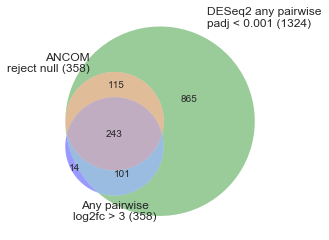

In [63]:
fig = plt.figure()
venn3([w, z, f], set_labels = ('ANCOM\nreject null (%s)' % len(w), 'DESeq2 any pairwise\npadj < 0.001 (%s)' % len(z), 'Any pairwise\nlog2fc > 3 (%s)' % len(f)))
fig.savefig('cutoff_venn.pdf')